# Análise exploratória dos dados coletados do Mercado Livre

In [1]:
import pandas as pd

In [2]:
url = "../manipulacao-de-dados/dados_tratados_ml.csv"

In [3]:
df = pd.read_csv(url)

In [4]:
df.head()

,aluguel,zona,area,quarto
0,21000.0,sul,265.0,3.0
1,2000.0,sul,45.0,1.0
2,1499.0,sul,45.0,1.0
3,4500.0,sul,112.0,3.0
4,4500.0,sul,125.0,3.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1132 entries, 0 to 1131
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   aluguel  1132 non-null   float64
 1   zona     1132 non-null   object 
 2   area     1132 non-null   float64
 3   quarto   1132 non-null   float64
dtypes: float64(3), object(1)
memory usage: 35.5+ KB


In [6]:
df.describe().T # describe da estatística descritiva

,count,mean,std,min,25%,50%,75%,max
aluguel,1132.0,2530.519435,5557.360467,500.0,1359.75,1900.0,2800.0,179999.0
area,1132.0,72.629859,48.711550,13.0,46.00,60.0,81.0,450.0
quarto,1132.0,1.911661,0.733899,1.0,1.00,2.0,2.0,6.0


In [7]:
import matplotlib.pyplot as plt

In [8]:
df[['aluguel', 'quarto']]

,aluguel,quarto
0,21000.0,3.0
1,2000.0,1.0
2,1499.0,1.0
3,4500.0,3.0
4,4500.0,3.0
...,...,...
1127,1500.0,1.0
1128,9300.0,3.0
1129,2000.0,2.0
1130,1600.0,2.0


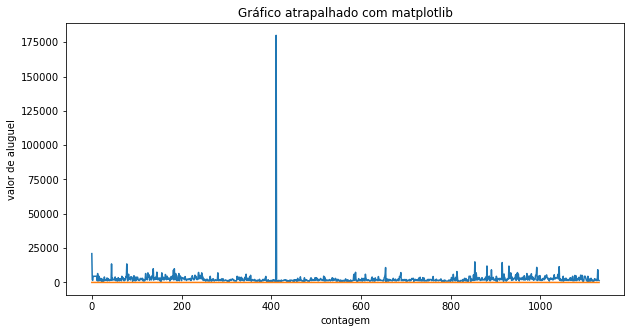

In [9]:
plt.figure(figsize=(10, 5)) # largura, altura
plt.plot(df[['aluguel', 'quarto']])
plt.ylabel('valor de aluguel')
plt.xlabel('contagem')
plt.title('Gráfico atrapalhado com matplotlib');

In [10]:
df['quarto'].values

array([3., 1., 1., ..., 2., 2., 1.])

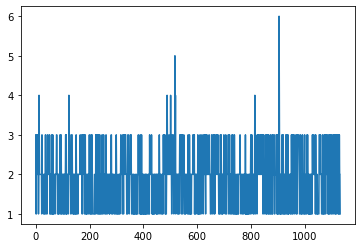

In [11]:
plt.plot(df['quarto'].values);

In [12]:
import seaborn as sns

Primeira hipótese: será que os aluguéis vão aumentando de acordo com o número de quartos?

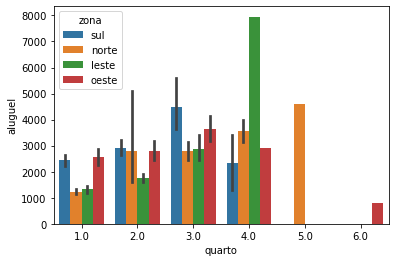

In [13]:
sns.barplot(x='quarto', y='aluguel', data=df, hue='zona');

Nos dados que coletamos essa hipótese se mantém e também podemos ver que os aluguéis são mais caros na zona sul e, em seguida, na zona oeste.

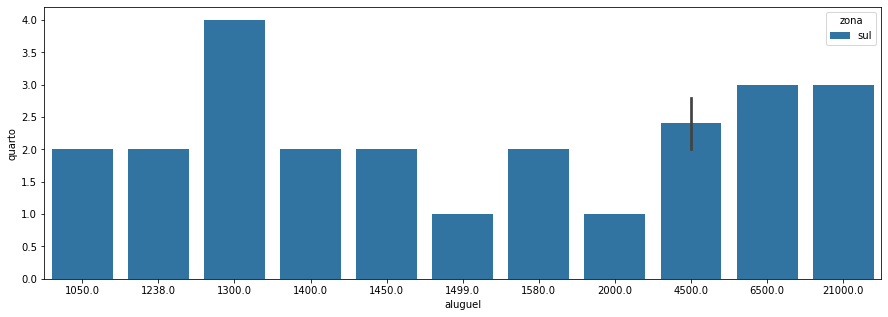

In [14]:
plt.figure(figsize=(15, 5))
sns.barplot(y='quarto', x='aluguel', data=df[:20], hue='zona');

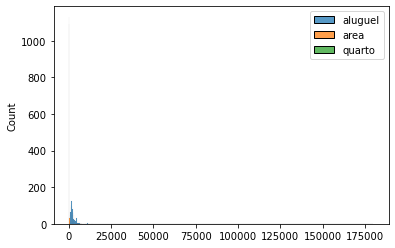

In [15]:
# Qual gráfico podemos usar para ver como os nossos dados estão distribuídos?
# histograma
sns.histplot(data=df);

Percebemos que as distribuições e area e aluguel são assimétricas e enviesadas à direita (tem a cauda para a direita), por isso, elas são consideradas Log Normais.

E se fizermos uma transformação logaritmica nesses dados, tornamos essas distribuição mais próxima da distribuição normal.

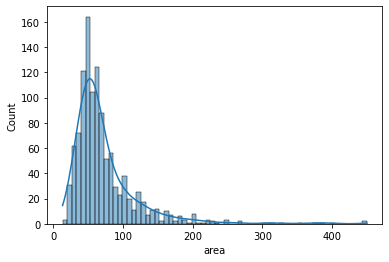

In [16]:
sns.histplot(data=df, x='area', kde=True);

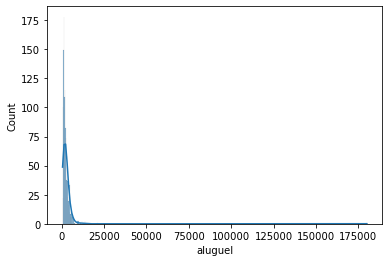

In [17]:
sns.histplot(data=df, x='aluguel', kde=True);

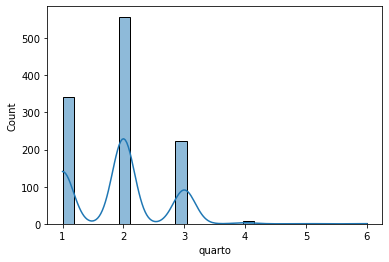

In [18]:
sns.histplot(data=df, x='quarto', kde=True);

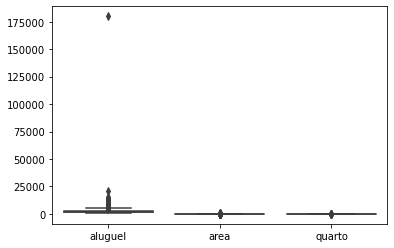

In [19]:
sns.boxplot(data=df);

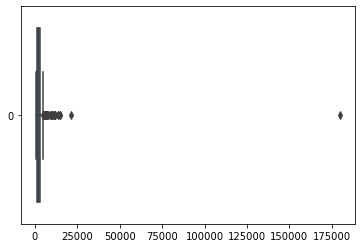

In [20]:
sns.boxplot(data=df['aluguel'], orient='h');

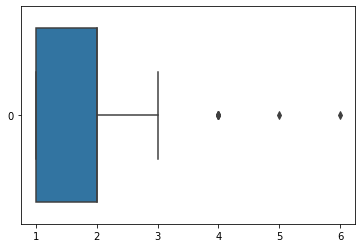

In [21]:
sns.boxplot(data=df['quarto'], orient='h');

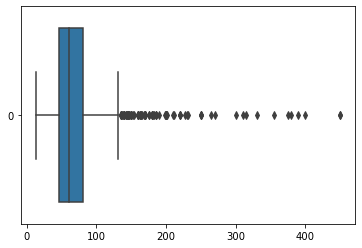

In [22]:
sns.boxplot(data=df['area'], orient='h');

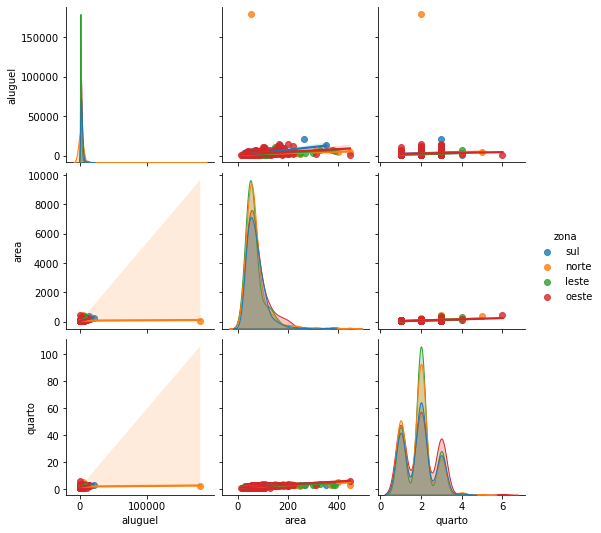

In [23]:
sns.pairplot(data=df, hue='zona', kind='reg');

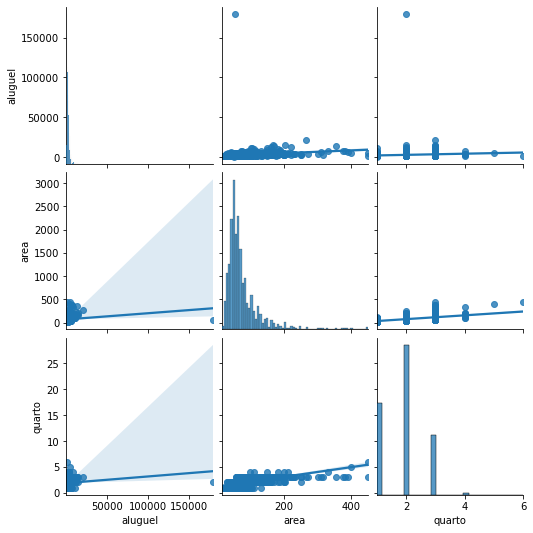

In [24]:
sns.pairplot(data=df, kind='reg');

Há diversos tipos de correlação, dependendo da distribuição dos dados, algumas se encaixam melhor para o cálculo.

In [25]:
correlacao_p = df.corr() # correlação de Pearson

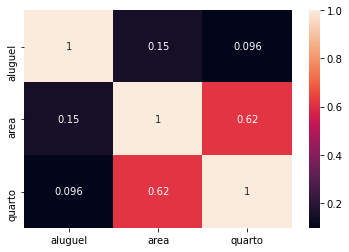

In [26]:
sns.heatmap(correlacao_p, annot=True);

In [27]:
correlacao_s = df.corr(method='spearman')

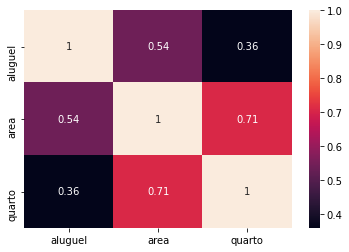

In [28]:
sns.heatmap(correlacao_s, annot=True);